# 1. What is NLP?
- Subfield of AI and linguistics that focuses on the interaction between computers and humans through natural language.
- The goal - to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful.

# 2. Word Clouds
- Visualize words and counts such as $(size\_of\_word) \ \ \alpha \ \ (word\_count)$
- Manually create a list of tuples (word, freq in job posts)
- install wordcloud to plot: pip install wordcloud 

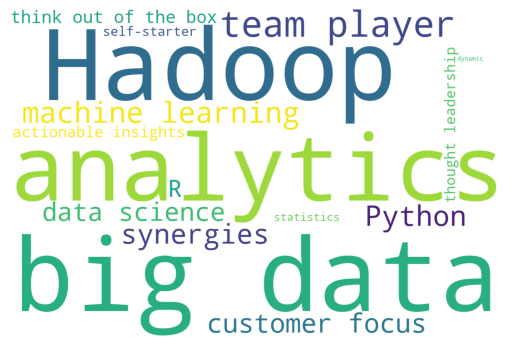

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Example data [(word, freq in job posts)]
data = [
    ("big data", 100), ("Hadoop", 95), ("Python", 75),
    ("R", 50), ("machine learning", 80), ("statistics", 20),
    ("data science", 60), ("analytics", 90),
    ("team player", 85), ("dynamic", 2), ("synergies", 70),
    ("actionable insights", 40), ("think out of the box", 45),
    ("self-starter", 30), ("customer focus", 65),
    ("thought leadership", 35)]

# Convert data into dict
word_freq = {word: freq for word, freq in data}

# Create word cloud
wordcloud = WordCloud(background_color='white', width=1200, height=800).generate_from_frequencies(word_freq)

# Display using matplotlib
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- Is there any use of this data plot? - No, it just looks neat and doesn't tell anything.
- Let's scatter them so that - horizontal position indicates posting popularity and - vertical position indicates resume popularity, whichproduces a visualization that conveys a few insights.

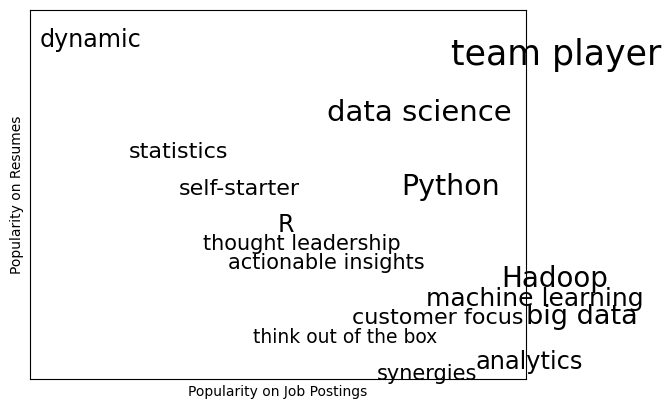

In [2]:
from matplotlib import pyplot as plt

data = [
    ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
    ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
    ("data science", 60, 70), ("analytics", 90, 3),
    ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
    ("actionable insights", 40, 30), ("think out of the box", 45, 10),
    ("self-starter", 30, 50), ("customer focus", 65, 15),
    ("thought leadership", 35, 35)
]

# To also vary textsize wrt total counts
def text_size(total: int) -> float:
    """
    equals 8 if total is 0, 28 if total is 200
    """
    return 8 + ((total / 200) * 20)

for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word, size=text_size(job_popularity+resume_popularity))

plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0,100, 0,100])
plt.xticks([])
plt.yticks([])
plt.show()

# 3. n-Gram Language Models

- n-gram is used in NLP to model sequence of items in text.
- The "n" in n-gram refers to the number of items in the sequence.
- Example:
  > - Unigram (1-gram):  
  > Example: In the sentence "I love NLP," the unigrams are ["I", "love", "NLP"].
  > - Bigram (2-gram):  
  >  Example: In the sentence "I love NLP," the bigrams are ["I love", "love NLP"].
  > - Trigram (3-gram):  
  > Example: In the sentence "I love NLP," the trigrams are ["I love NLP"].

- For example, we want to write thousands of web pages programmatically. How can we do this?
- We will take a sample text, and learn the n-gram of the texts, and using the Learned model we will generate new text.
- Sample data url: http://radar.oreilly.com/2010/06/what-is-data-science.html
- Issue to be resolved first:
  > 1. apostrophes in the text are actually the Unicode character u"\u2019".  
  >    We’ll create a helper function to replace them with normal apostrophes:

In [1]:
def fix_unicode(text: str) -> str:
    return text.replace(u"\u2019", "'")

In [14]:
# Get the text of web page

import re
from bs4 import BeautifulSoup
import requests

url = "https://www.oreilly.com/ideas/what-is-data-science"
html = requests.get(url).text
# print(html)
soup = BeautifulSoup(html, 'html5lib')
# print(soup)

content = soup.find('div', id='post-radar-content')
# print(content('p'))

regex = r"[\w']+|[\.]"
document = []

for paragraph in content("p"):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)

print(document[:20])

['Weâ', 've', 'all', 'heard', 'it', 'according', 'to', 'Hal', 'Varian', 'statistics', 'is', 'the', 'next', 'sexy', 'job', '.', 'Five', 'years', 'ago', 'in']


- Current State:
> - The text data we extracted still contains some unnecessary parts
> - (e.g., section titles, mid-sentence periods like in "Web 2.0", captions, and lists).
- Ideal State:
> - Ideally, we should clean this text to remove these extraneous parts, but for now, we'll proceed with the data as it is.

**Modeling Language with Bigrams**

What is a Bigram Model?
> - A bigram is a pair of consecutive words in a text.
> - For example, in the sentence "data science is cool", the bigrams are ("data", "science"), ("science", "is"), and ("is", "cool").

> - Bigram Model uses these pairs of words to understand the structure of the text.
> - It helps in predicting the next word based on the current word.

How Does it Work?

> Starting with a Word:
> - Begin with a starting word. For example, let's start with the word "data".  

> Finding the Next Word:
> - Look at all the words that come immediately after "data" in the text.
> - Suppose in the text, "data" is followed by "science", "mining", and "analysis".
> - Randomly choose one of these words as the next word. Let's say we pick "science".

> Repeating the Process:
> - Now, our current word is "science".
> - Look at all the words that follow "science" in the text.
> - Suppose "science" is followed by "is", "and", and "in".
> - Randomly pick one of these words. Let's say we pick "is".

> Continuing Until a Period:
> - Repeat this process of finding the next word and appending it to our sentence until we encounter a period (".").
> - A period signifies the end of a sentence.

Example Sentence Generation
> - Let's say we have the text: "Data science is cool. Data mining is useful."
> - Using the bigram model, we might generate a sentence like:
> - Start with "Data"
> - Possible next words: "science", "mining"
> - Suppose we pick "science"
> - Current sentence: "Data science"
> - Next words after "science": "is"
> - Current sentence: "Data science is"
> - Next words after "is": "cool", "useful"
> - Suppose we pick "cool"
> - Current sentence: "Data science is cool"
> - Next word after "cool": period (".")
> - Sentence complete: "Data science is cool."


In [15]:
from collections import defaultdict
import random

transitions = defaultdict(list) # Automatically create an empty list if a key doesn't exist
x=zip(document, document[1:]) # create list of tuples of each consecutive word pair
# print(*x)

for prev, current in x:
    transitions[prev].append(current)  # create dict of {word : its possible consecutive words list}
# print(transitions)
    
# Let's generate sentences
def generate_using_bigrams() -> str:
    current = '.' # This means the next word will start a sentence
    result = []
    while True: # Starts an infinite loop that will keep executing the code inside it until it's explicitly broken out of. 
                # This is useful when you don't know in advance how many iterations you'll need.
        next_word_candidates = transitions[current]
        current = random.choice(next_word_candidates) # Choose random next word
        result.append(current) 
        if current == '.':
            return " ".join(result)  # joins the elements if list-result with a space between them



In [16]:
generate_using_bigrams()  # gibberish sentence generated

'Sites like the point itâ s a population Making data was recently searching a few examples Google isnâ t just throw the data samples with a â Thatâ s Processing is certainly worth a red herring .'

- To make sentences less gibberishy, we can use a trigram model.
- This model looks at three consecutive words (triplets) instead of two (bigrams).
- By considering the context of two previous words, we can generate more coherent and meaningful sentences.


In [17]:
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in zip(document, document[1:], document[2:]):
    if prev == '.':
        starts.append(current)
    trigram_transitions[(prev, current)].append(next)

# Top 5 elements of dict
keys = list(trigram_transitions.keys()) 
for i in range(10):
    print(keys[i],':', trigram_transitions[keys[i]])

('Weâ', 've') : ['all', 'all', 'all']
('ve', 'all') : ['heard', 'heard', 'heard']
('all', 'heard') : ['it', 'a', 'the']
('heard', 'it') : ['according']
('it', 'according') : ['to']
('according', 'to') : ['Hal']
('to', 'Hal') : ['Varian']
('Hal', 'Varian') : ['statistics']
('Varian', 'statistics') : ['is']
('statistics', 'is') : ['the', 'that', 'the']


In [18]:
def generate_using_trigrams() -> str:
    current = random.choice(starts)
    prev = '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)
        prev,current = current, next_word
        result.append(current)

        if current == '.':
            return " ".join(result)

In [19]:
generate_using_trigrams() # Producing better sentences than bigram

'Then at books members had in their libraries .'

- Of course, they sound better because at each step the generation process has fewer choices, and at many steps only a single choice.
- This means that we frequently generate sentences (or at least long phrases) that were seen verbatim in the original data.
- Having more data would help; it would also work better if we collected n-grams from multiple essays about data science

# 4. Grammars

- Here we create rules of grammar to generate sentences.
- We will define the grammar as follows:
  > - Word starting with undersocre is expandable
  > - Others are terminal symbols

**Sentence generation process**
> 1. Start with a sentence rule
> 2. Exapand the rules
> 3. Repeat the expansion until all rules are replaced by terminal symbols

In [20]:
from typing import Dict, List
Grammar = Dict[str, List[str]] # define grammar type

grammar = {
    "_S" : ["_NP _VP"],                      # Sentence -> Noun Phrase + Verb Phrase
    "_NP" : ["_N",                           # Noun Phrase -> Noun
             "_A _NP _P _A _N"],             # or Adjective + Noun Phrase + Preposition + Adjective + Noun 
                                             # _NP contanis one _NP -- grammar can be recursive
                                             # Recusrion allows even finite grammar to generate infinitely many different sentences
    "_VP" : ["_V",                           # Verb Phrase -> Verb
             "_V _NP"],                      # or Verb + Noun Phrase
    "_N" : ["data science", "Python", "regression"],    # Nouns
    "_A" : ["big", "linear", "logistic"],    # Adjectives
    "_P" : ["about", "near"],                # Prepositions
    "_V" : ["learns", "trains", "tests", "is"]  # Verbs
}

**Example of Sentence Generation**
1. Start with "_S"
2. Expand to ["_NP _VP"]
3. - Randomly exapnd _NP -- lets's say "_N"
   - Randomly expand _VP -- let's say "_V _NP"
   >  Updated to -- ["_N _V _NP"]
4. - Exapnd _N -- "Python"
   - Exapnd _V -- "tests"
   - Exapnd _NP -- "_N"
   >  Updated to -- ["Python", "tests", "_N"]
5. - Exapnd _N -- "regression"
   >  Updated to -- ["Python", "tests", "regression"]

- Final statement generated is
>  "Python tests regression"

In [21]:
# Helper function to check if token is terminal token
def is_terminal(token: str) -> bool:
    return token[0] != "_"

def expand(grammar: Grammar, tokens: List[str]) -> List[str]:
    print(f"{tokens=}")
    for i, token in enumerate(tokens):
        print(f"{i=}")
        # print(token)
        # Skip if the token is a terminal (a word)
        iteration =+1
        if is_terminal(token):
            continue
        
        # Choose a random production for the non-terminal token
        replacement = random.choice(grammar[token])
        print(replacement)
        
        if is_terminal(replacement):
            # Replace the token with the terminal word
            tokens[i] = replacement
        else:
            # Replace the token with a sequence of non-terminals
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
        
        # Recursively expand the new list of tokens
        return expand(grammar, tokens)
    
    # If all tokens are terminal, return the list of tokens
    return tokens

def generate_sentence(grammar: Grammar) -> List[str]:
    return expand(grammar, ["_S"])

    

In [22]:
# Function to generate a sentence
def generate_sentence(grammar: Grammar) -> List[str]:
    return expand(grammar, ["_S"])

# Generate and print a sentence
sentence = generate_sentence(grammar)
print(" ".join(sentence))

tokens=['_S']
i=0
_NP _VP
tokens=['_NP', '_VP']
i=0
_N
tokens=['_N', '_VP']
i=0
data science
tokens=['data science', '_VP']
i=0
i=1
_V
tokens=['data science', '_V']
i=0
i=1
is
tokens=['data science', 'is']
i=0
i=1
data science is


# 5. Gibbs Sampling
- Gibbs sampling is a technique for <u> generating samples from multidimensional distributions</u> when we only know some of the conditional distributions.

- Used in Bayesian Inference(Posterior prob) and LDA for topic modeling.


- Its easy to generate samples using some common distributions. Eg.:
  >- random.random() will generate all samples ranging from 0-1 -- means we can get UNIFORM Distributed random samples
  >- inverse_normal_cdf(random.random()) -- will generate NORMAL distributed samples.

- But some distributions are harder to sample from.


Example Scenario:
> Imagine we have two dice:
> - x is the value of the first die.
> - y is the sum of the values of both dice.  
> - We want to generate lots of pairs (x,y) where x and y follow their respective distributions.

- This can be done in two ways: Direct Sampling and Gibbs Sampling
1. **Direct Sampling**  
If we can roll the dice directly, generating the pairs is straightforward:
> 1. **Roll the first die (d1).**
> 2. **Roll the second die (d2).**
> 3. **Calculate y as the sum of d1 and d2.**


In [23]:
# Direct Sampling

from typing import Tuple
import random

def roll_a_die() -> int:
    return random.choice([1,2,3,4,5,6])

def direct_sample() -> Tuple[int, int]:
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1+d2

2. **Gibbs Sampling**

Let's say we only know how to sample based on one value given the other:

> 1. Given x, what is y?
>  - If we know x, y can be any of ( x + 1, x + 2, x + 3, x + 4, x + 5, x + 6 ).

> 2. Given y, what is x?
> - This is a bit trickier because:
> - If y is small (e.g., 2), x must be small (e.g., 1).
> - If y is larger (e.g., 11), x could be any of the higher values (e.g., 5 or 6).

So, in Gibbs Sampling
1. **Initialize** with any valid values for x and y.
2. **Repeat** for a number of iterations:
   - **Update x** using the conditional distribution given y.
   - **Update y** using the conditional distribution given x.


In [24]:
def random_y_given_x(x: int) -> int:
    """
    equally likely to be x + 1, x + 2, ... , x + 6
    """
    return x + roll_a_die()

def random_x_given_y(y: int) -> int:
    if y <= 7:
        # if the total is 7 or less, the first die is equally likely to be
        # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # if the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)

In [25]:
def gibbs_sample(num_iters: int = 100) -> Tuple[int, int]:
    x, y = 1, 2 # Choose any random values
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

In [26]:
# Compare direct sample and Gibbs Sample
from typing import Dict, List
from collections import defaultdict
def compare_distributions(num_samples: int = 1000) -> Dict[int, List[int]]:
    counts = defaultdict(lambda: [0,0])
    
    for _ in range(num_samples):
        counts[gibbs_sample()][0] +=1
        # print(counts)
        counts[direct_sample()][1] +=1
        # print(counts)
    return counts

In [27]:
compare_distributions(1000)

defaultdict(<function __main__.compare_distributions.<locals>.<lambda>()>,
            {(2, 8): [32, 34],
             (2, 5): [24, 23],
             (1, 3): [18, 23],
             (1, 2): [30, 38],
             (6, 9): [26, 29],
             (2, 6): [36, 39],
             (3, 8): [22, 28],
             (4, 10): [24, 21],
             (5, 7): [29, 25],
             (1, 7): [32, 32],
             (2, 3): [29, 21],
             (4, 7): [26, 31],
             (5, 6): [24, 36],
             (3, 7): [25, 20],
             (5, 9): [32, 28],
             (2, 7): [28, 39],
             (3, 6): [28, 31],
             (3, 5): [29, 29],
             (6, 7): [29, 25],
             (1, 5): [26, 25],
             (6, 10): [38, 30],
             (1, 4): [23, 26],
             (5, 10): [34, 26],
             (5, 8): [23, 24],
             (4, 9): [29, 35],
             (3, 4): [30, 31],
             (2, 4): [29, 19],
             (6, 12): [26, 28],
             (6, 11): [34, 22],
             (1, 6): 

# 6. Topic Modeling
- To find out main themes in a large text/document
- Can be used in document classification, summarization etc

**Keywords:**
> 1. Document: A single piece of text, such as an article or a paper.
> 2. Corpus: A collection of documents.
> 3. Topic: A distribution over words that represents a theme or subject within the corpus.
> 4. Word Distribution: Each topic is characterized by a distribution of words, where each word has a probability of belonging to that topic.

**Latent Dirichlet allocation (LDA)**
- Similar to Naive bayes probabilitic model.  
- LDA is Generative probabilistic model that assumes:
> 1. Each Document is mixture of Topics. 
> 2. Each Topic is mixture of Words.
> - LDA works by trying to reconstruct the documents in the Corpus using a set of topics.
> - It assigns probabilities to Topics within each Document [doc1: p(t1), p(t2)..etc,]
> - and probabilities to Words within each Topic. [t1: p(w1), p(w2)...etc, ]

**Steps in LDA**
1. Initialization: Randomly assign each word in each document to one of the K topics.

2. Iteration:
> - For each document, update the topic distribution based on the current assignment of words to topics.
> - For each word, update the word distribution for the topic it is assigned to.
> - Reassign each word to a new topic based on the updated distributions.
3. Convergence: Repeat the iteration until the topic assignments stabilize.

- **The process involves estimating the probabilities of topics within each document based on the probabilities of words within each topic and the observed words in each document.**

**Mathematics of LDA**
Assume,

1. $K$: Fixed number of Topics are there
2. Under each Topic there is probability list of each Word $(P(w|k))$: We will assign it randomly.
   > - Means each document becomes a mixture of Topics.
3. To generate a document
   > - we will randomly pick a topic
   > - then randomly pick a word from Topic's word distribution.

In [28]:
# Function to randomly pick an index based on arbitrary set of weights
from collections import Counter
from typing import List
import random

def sample_from(weights: List[float]) -> int:
    """
    returns i with probability weights[i]/sum(weights)
    """
    total = sum(weights)
    # print(f"{total=}")
    rnd = total * random.random()
    # print(f"{rnd=}")
    for i, w in enumerate(weights):
        rnd = (rnd - w)
        # print(f"{rnd=}")
        if rnd <= 0:
            return i

# Example
draws = Counter(sample_from([1,1,3]) for _ in range(1000))
assert  (1000/6) < draws[0] < (1000/4)  # probability of index 0 will be 1/5 approx
assert  (1000/6) < draws[1] < (1000/4)  # probability of index 1 will be 1/5 approx
assert  (3000/6) < draws[2] < (3000/4)  # probability of index 2 will be 3/5 approx
assert draws[0] + draws[1] + draws[2] == 1000 

In [29]:
# Example document list
documents = [
["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
["R", "Python", "statistics", "regression", "probability"],
["machine learning", "regression", "decision trees", "libsvm"],
["Python", "R", "Java", "C++", "Haskell", "programming languages"],
["statistics", "probability", "mathematics", "theory"],
["machine learning", "scikit-learn", "Mahout", "neural networks"],
["neural networks", "deep learning", "Big Data", "artificial intelligence"],
["Hadoop", "Java", "MapReduce", "Big Data"],
["statistics", "R", "statsmodels"],
["C++", "deep learning", "artificial intelligence", "probability"],
["pandas", "R", "Python"],
["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
["libsvm", "regression", "support vector machines"]
]

# Number of Topics we want to divide document into
K = 4

In [30]:
## Data structures to keep track of several counts
# These counts will be used while calculating sampling weights

# A list of counters, for each document in documents list to count topics in each document
document_topic_counts = [Counter() for _ in documents]

# A list of counters one for each topic to count number of times a word assigned with one topic
topic_word_counts = [Counter() for _ in range(K)]

# A list of total number of words in each topic
topic_counts = [0 for _ in range(K)]

# A list of numbers, for each document to count total number of words in it
document_lengths = [len(document) for document in documents]

# Number of distinct words
distinct_words = set(word for document in documents 
                     for word in document)
W = len(distinct_words)

# Number of documents 
D = len(documents)

In [31]:
# Conditional probability functions


# Probability of appearing particular topic in given document
def p_topic_given_document(topic: int, d: int, alpha: float = 0.1) -> float:
    """
    Fraction of words with a given topic in document d (plus some smoothing alpha)
    """
    words = document_topic_counts[d][topic]  # words assigned with 'topic' in document 'd'
    total_words = document_lengths[d] # total words in document 'd'
    p = (words + alpha) / (total_words + K * alpha)
    return p

# Probaility of apperaing particular word in given topic
def p_word_given_topic(word: str, topic: int, beta: float = 0.1) -> float:
    """
    Fraction of words assigned to 'topic' that equal 'word' (plus smoothing beta)
    """
    words = topic_word_counts[topic][word] # number of times a 'word' appearing under given 'topic'
    total_words = topic_counts[topic]  # total count of all words appeared in given topic
    p = (words * beta) / (total_words + W * beta)
    return p

In [32]:
def topic_weight(d: int, word: str, k: int) -> float:
    """
    Given a document and a word in that document, return the weight for the kth topic
    """
    weight = p_word_given_topic(word, k) * p_topic_given_document(k, d)   # called Joint Probability(details not included here)
    return weight

def choose_new_topic(d: int, word: str) -> int:
    return sample_from([topic_weight(d, word, k) for k in range(K)])

In [33]:
# Assign every word a random topic first
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

print(documents)
print(document_topics)

[['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], ['R', 'Python', 'statistics', 'regression', 'probability'], ['machine learning', 'regression', 'decision trees', 'libsvm'], ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'], ['statistics', 'probability', 'mathematics', 'theory'], ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'], ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence'], ['Hadoop', 'Java', 'MapReduce', 'Big Data'], ['statistics', 'R', 'statsmodels'], ['C++', 'deep learning', 'artificial intelligence', 'probability'], ['pandas', 'R', 'Python'], ['databases', 'HBase', 'Postgres', 'MySQL', 'MongoDB'], ['libsvm', 'regression', 'support vector machines']]
[[3, 3, 0, 2, 3, 3, 2], [3, 2, 1, 1, 2], [1, 0, 2, 1, 2, 0], [0, 2, 3, 0, 2], [3, 2, 1, 3], [3, 2, 0, 0, 0, 3], [0, 3, 2, 1

In [34]:
for d in range(D):
    print(f"{documents[d]=}")
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1 
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1
print(f"{document_topic_counts=}")
print(f"{topic_word_counts=}")
print(f"{topic_counts=}")

documents[d]=['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
documents[d]=['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
documents[d]=['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
documents[d]=['R', 'Python', 'statistics', 'regression', 'probability']
documents[d]=['machine learning', 'regression', 'decision trees', 'libsvm']
documents[d]=['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
documents[d]=['statistics', 'probability', 'mathematics', 'theory']
documents[d]=['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
documents[d]=['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
documents[d]=['Hadoop', 'Java', 'MapReduce', 'Big Data']
documents[d]=['statistics', 'R', 'statsmodels']
documents[d]=['C++', 'deep learning', 'artificial intelligence', 'probability']
documents[d]=['pandas', 'R', 'Python']
documents[d]=['databases', 'HBase', 'Postgres', 'MySQL', 'MongoDB']
documents

In [35]:
import tqdm

for iter in tqdm.trange(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d], document_topics[d])):

            # First remove this word/ topic from counts
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # Then assign new topic to this word based on weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # Now add it back to counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1
            
            

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 5822.32it/s]


In [36]:
# Let's see what are the words assigned to each topic number

for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0:
            print(k, word, count)
            

0 Java 3
0 Big Data 3
0 scikit-learn 2
0 pandas 2
0 Hadoop 2
0 statsmodels 2
0 libsvm 2
0 Haskell 1
0 Spark 1
0 Storm 1
0 NoSQL 1
0 scipy 1
0 numpy 1
0 decision trees 1
0 programming languages 1
0 mathematics 1
0 theory 1
0 Mahout 1
0 MapReduce 1
0 databases 1
0 MySQL 1
0 support vector machines 1
1 Cassandra 2
1 neural networks 2
1 deep learning 2
1 Postgres 2
1 MongoDB 2
2 Python 4
2 R 4
2 regression 3
2 statistics 3
2 HBase 3
2 machine learning 2
2 C++ 2
2 artificial intelligence 2
3 probability 3


In [37]:
#Let's assign topic names as per most common words under that topic

topic_names = ["Big Data and programming languages",
                "Python and statistics",
                "databases",
                "machine learning"]


In [38]:
for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
Big Data and programming languages 5
databases 1
Python and statistics 1

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
Python and statistics 3
databases 1
Big Data and programming languages 1

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Big Data and programming languages 5
databases 1

['R', 'Python', 'statistics', 'regression', 'probability']
databases 4
machine learning 1

['machine learning', 'regression', 'decision trees', 'libsvm']
databases 2
Big Data and programming languages 2

['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
databases 3
Big Data and programming languages 3

['statistics', 'probability', 'mathematics', 'theory']
Big Data and programming languages 2
machine learning 1
databases 1

['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
Big Data and programming languages 2
databases 1
Python and statistics 1

['neural networks', '

# 7. Word Vectors

- It is a numerical representation of words in low-dimensional space.

**What is meant by low-dimensional space?**
- Suppose we want to numerically represent a Vocabulary data which has 10000 words
- <u>High-dimensional space</u>:
> - If we one-hot-encode these all words, then all words will be vectors of 10000 elements i.e. 1 at one position and others 0
> - This is computationally very expensive
- <u> Low-dimensional space</u>:
> - These words are represented as word embeddings
> - So, it typically represents each word as vector of 50, 100, or 300 etc dimensions, which is very less than high-dim space
- Take an example:
  > - Suppose we have words "king", "queen", "man", and "woman"
  > - One-hot encoded vectors of these will be:  
  >   'king: [1, 0, 0, 0]  
queen: [0, 1, 0, 0]  
man: [0, 0, 1, 0]  
woman: [0, 0, 0, 1]'  
> - In Low-dimensional space, embeddings can be like:  
> king: [0.8, 0.1, 0.4]  
queen: [0.9, 0.1, 0.5]  
man: [0.7, -0.2, 0.1]  
woman: [0.8, -0.1, 0.3]  

- In low-dimensional vectors, similar words come near each other and operations like additiona, substraction etc are meaningful
> - Example:  king - man + woman ≈ queen

**Steps to create Word Vectors**
1. We will create a toy dataset to learn word vectors(word embeddings)

In [1]:
# Let's try with a toy dataset

colors = ["red", "green", "blue", "yellow", "black", ""]
nouns = ["bed", "car", "boat", "cat"]
verbs = ["is", "was", "seems"]
adverbs = ["very", "quite", "extremely", ""]
adjectives = ["slow", "fast", "soft", "hard"]

import random

def make_sentence() -> str:
    return " ".join(["The", 
                     random.choice(colors),
                     random.choice(nouns),
                     random.choice(verbs),
                     random.choice(adverbs),
                     random.choice(adjectives),"."])

NUM_SENTENCES = 50
random.seed(0)
sentences = [make_sentence() for _ in range(NUM_SENTENCES)]
print(sentences)  # These are our sample data

['The yellow cat is extremely hard .', 'The yellow boat was extremely fast .', 'The black car was quite slow .', 'The black boat seems quite soft .', 'The red bed seems extremely hard .', 'The black bed was  soft .', 'The black car seems  hard .', 'The black boat is very slow .', 'The  cat seems very hard .', 'The blue car seems extremely slow .', 'The green car is quite hard .', 'The red bed was  slow .', 'The blue boat seems very soft .', 'The black car seems extremely hard .', 'The red cat was quite soft .', 'The green car is very soft .', 'The yellow bed is quite fast .', 'The red bed seems  soft .', 'The black car is  soft .', 'The yellow cat seems extremely slow .', 'The blue bed was extremely fast .', 'The green bed seems extremely slow .', 'The  car was quite soft .', 'The yellow bed is quite fast .', 'The red bed is very fast .', 'The black bed was very soft .', 'The red bed seems very fast .', 'The green bed was quite slow .', 'The  bed seems  slow .', 'The blue bed is very s

2. Then we Tokenize the dataset and Create Vocabulary: Convert all sentences to lower case and split in words. And then we create a 'Vocabulary' where we assign each word an id.

In [2]:
# Lowercase the snetences and split them into words
import re

tokenized_sentences = [re.findall("[a-z]+|[.]", sentence.lower()) 
                       for sentence in sentences]

# The regex [a-z]+|[.] matches sequences of lowercase letters ([a-z]+) or periods ([.]).
# When re.findall is used, it scans the input string and captures all sequences that match the given pattern.
# Any characters that are not part of the pattern, such as spaces, act as delimiters between matches but are not captured themselves.



from typing import List, Dict
from scratch.deep_learning import Tensor

class Vocabulary:
    def __init__(self, words: List[str] = None) -> None:
        self.w2i: Dict[str, int] = {} # word -> word_id
        self.i2w: Dict[int, str] = {} # word_id to word

        for word in (words or []):  # means if words list is None, it will default to an empty list
            self.add(word)

    @property  # decorator to define methods as attributes. 
               # access methods like attributes without explicitly calling them
    def size(self) -> int:
        """ How many words are in the vocabulary"""
        return len(self.w2i)

    def add(self, word: str) -> None:
        if word not in self.w2i:  # If word is new to us
            word_id = len(self.w2i) # Find next id
            self.w2i[word] = word_id # Add that to word -> word_id map
            self.i2w[word_id] = word # Add that to word_id -> word map

    def get_id(self, word: str) -> int:
        """ return the id of the word (or none)"""
        return self.w2i.get(word)  # .get(key) gives keys' value

    def get_word(self, word_id:int) -> str:
        """ return the word with given id (or none)""" 
        return self.i2w.get(word_id)

    def one_hot_encode(self, word: str) -> Tensor: 
        word_id = self.get_id(word)
        assert word_id is not None, f"unknown word {word}"  # if word_id is None it will print this
        return [1.0 if i == word_id else 0.0 for i in range(self.size)] 
        
# One-hot encoding is a way of representing categorical data (like words) as vectors. 
# Each word is represented by a vector with a 1 at the index corresponding to that word and 0 elsewhere.       

# Create a Vocabulary (i.e., a mapping word -> word_id) based on our text
vocab = Vocabulary(word 
                   for sentence_words in tokenized_sentences
                   for word in sentence_words)

3. Create Training Data
- In this we will have input word and nearby words
- inputs = List of IDs of words
- targets = List of one-hot-encoded vectors of word's nearby words

In [3]:
inputs = []
targets = []

for sentence in tokenized_sentences:
    # print(f"{sentence=}")
    for i, word in enumerate(sentence):
        # print(f"{i=},{word=}")
        for j in [i - 2, i - 1, i + 1, i + 2]:
            # print(f"{j=}")
            if 0 <= j < len(sentence):
                nearby_word = sentence[j]
                # print(f"{nearby_word=}")
                inputs.append(vocab.get_id(word))
                # print(f"{inputs=}")
                targets.append(vocab.one_hot_encode(nearby_word))
                # print(f"{targets=}")

4. Create Embedding Layer
- Now we will make an Embedding layer that will convert word IDs to word vectors.

In [4]:
from scratch.deep_learning import Layer, Tensor, random_tensor, zeros_like

class Embedding(Layer):
    def __init__(self, num_embeddings, embedding_dim):
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim
        self.embeddings = random_tensor(num_embeddings, embedding_dim)
        self.grad = zeros_like(self.embeddings)
        self.last_input_id = None

    def forward(self, input_id):
        self.input_id = input_id
        return self.embeddings[input_id]

    def backward(self, gradient):
        if self.last_input_id is not None:
            zero_row = [0 for _ in range(self.embedding_dim)]
            self.grad[self.last_input_id] = zero_row
        self.last_input_id = self.input_id
        self.grad[self.input_id] = gradient

    def params(self):
        return [self.embeddings]

    def grads(self):
        return [self.grad]


5. Train the model
   - Finally, lets train a model so that we can update embeddings.

- To compare the two vectors we define:  **Cosine similarity**
- Measures the cosine of the angle between two vectors.
- It ranges from -1 to 1, where:
> - 1 means the vectors are identical (i.e., they point in the same direction).
> - 0 means the vectors are orthogonal (i.e., they have no similarity).
> - -1 means the vectors are diametrically opposed (i.e., they point in exactly opposite directions).

- Formula:
  $$
  Cosine Similarity (A, B) = \frac{{A}\cdot{B}}{|A||B|}
  $$

In [7]:
from scratch.linear_algebra import dot, Vector
import math

def cosine_similarity(v1: Vector, v2: Vector) -> float:
    # print(f"{v1=}, {v2=}")
    return dot(v1, v2)/ math.sqrt(dot(v1,v1)*dot(v2,v2))

assert cosine_similarity([1,1],[1,1]) == 1  # Same direction
assert cosine_similarity([-1,-1],[1,1]) == -1  # Opposite direction 
assert cosine_similarity([1,0], [0,1]) == 0   # Orthogonal

In [9]:
#Subclass for word vectors
from typing import Tuple

class TextEmbedding(Embedding):
    def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
        # Call the superclass constructor
        super().__init__(vocab.size, embedding_dim)

        # And hang onto the vocab
        self.vocab = vocab


    # Method to retrieve vector from given word
    # This dunder __getitem__ allows us to directly use TextEmbedding object with ["WORD"] in square brackets like dict. 
    # Square brackets with objects will call dunder __getitem__ under class TextEmbedding
    def __getitem__(self, word: str) -> Tensor:   
        word_id = self.vocab.get_id(word)
        if word_id is not None:
            return self.embeddings[word_id]
        else:
            return None

    # closest words to a given word
    def closest(self, word: str, n: int = 5) -> List[Tuple[float, str]]:
        """
        Returns the n closest words based on cosine similarity
        """
        vector = self[word]  # this will call __getitem__ dunder
        # print(f"{vector=},{self.embeddings=}, self.vocab.w2i.items()=", self.vocab.w2i.items())
        # Compute pairs (similarity, other_word), and sort most similar first
        scores = [(cosine_similarity(vector, self.embeddings[i]), other_word)
                   for other_word, i in self.vocab.w2i.items()]
        scores.sort(reverse = True)
        return scores[:n]
        

In [10]:
from scratch.deep_learning import Sequential, Linear
random.seed(0)
EMBEDDING_DIM = 5 

# Define embedding layer
embedding = TextEmbedding(vocab =vocab, embedding_dim=EMBEDDING_DIM)

model = Sequential([embedding, Linear(input_dim=EMBEDDING_DIM, output_dim=vocab.size)])


from scratch.deep_learning import SoftmaxCrossEntropy, Momentum, GradientDescent
loss = SoftmaxCrossEntropy()
optimizer = GradientDescent(learning_rate=0.01)

for epoch in range(100):
    epoch_loss = 0.0
    for input, target in zip(inputs, targets):
        predicted = model.forward(input)
        epoch_loss += loss.loss(predicted, target)
        gradient = loss.gradient(predicted, target)
        model.backward(gradient)
        optimizer.step(model)
    print(epoch, epoch_loss) # Print the loss
    print(embedding.closest("black")) # and also a few nearest words
    print(embedding.closest("slow")) # so we can see what's being
    print(embedding.closest("car")) # learned.

0 2970.156429387063
[(1.0, 'black'), (0.7927247753692507, 'blue'), (0.5911733314896048, 'cat'), (0.5716654981660781, 'the'), (0.3026892975059721, 'car')]
[(1.0, 'slow'), (0.8936272640937163, 'green'), (0.5272141409772461, '.'), (0.356013304388346, 'yellow'), (0.29982973123116025, 'blue')]
[(1.0, 'car'), (0.7030889033452818, 'cat'), (0.519105254858335, 'fast'), (0.4236692673437953, 'very'), (0.3848186865089063, 'quite')]
1 2865.855510833289
[(1.0, 'black'), (0.8076054877794636, 'blue'), (0.6112459000264461, 'cat'), (0.5676562111596322, 'the'), (0.3273307461476133, 'car')]
[(1.0, 'slow'), (0.8795208130766505, 'green'), (0.5675261127213351, '.'), (0.3624106663078739, 'yellow'), (0.3593451263736934, 'boat')]
[(1.0, 'car'), (0.7121322616680856, 'cat'), (0.49717481866583696, 'fast'), (0.4099921723101964, 'very'), (0.3655326707405854, 'quite')]
2 2815.035526656466
[(1.0, 'black'), (0.8240340241906855, 'blue'), (0.6310891601317347, 'cat'), (0.5448895203899405, 'the'), (0.3541498544488745, 'car

- Now when model is trained we can explore similar words:

In [11]:
pairs = [(cosine_similarity(embedding[w1], embedding[w2]), w1, w2)
         for w1 in vocab.w2i
         for w2 in vocab.w2i
         if w1 < w2]
pairs.sort(reverse=True)
print(pairs[:5])


[(0.9948304450324577, 'bed', 'cat'), (0.9920899253848237, 'seems', 'was'), (0.9883988811665564, 'bed', 'boat'), (0.9821293900663808, 'black', 'blue'), (0.9709525703302307, 'green', 'red')]


In [12]:
# Helper function to save and load vocabulary

import json 

def save_vocab(vocab: Vocabulary, filename: str) -> None:
    with open(filename, 'w') as f:
        json.dump(vocab.w2i, f) # Only need to save w2i 

def load_vocab(filename:str) -> Vocabulary:
    vocab = Vocabulary()
    with open(filename) as f:
        # Load w2i and generate i2w from it
        vocab.w2i = json.load(f)
        vocab.i2w = {id: word for word, id in vocab.w2i.items()}

**Summary of word vectors**

- We can design skip-gram or CBOW word-vectors

1. Skip-gram: Predicts context (nearby words) from a given word.
> - Input: Current word.
> - Target: Nearby words.

2. CBOW (Continuous Bag of Words): Predicts a word from its context (nearby words).
> - Input: Nearby words.
> - Target: Current word.

**Explanation of the Skip-gram Example**
- In the Skip-gram model, we use the current word to predict the nearby words.  

Example Sentence
> - Let's use the sentence: "The green boat seems quite slow."
-  Tokenization and Vocabulary
> - Tokenized Sentence: ["the", "green", "boat", "seems", "quite", "slow", "."]
> - Vocabulary: {"the": 0, "green": 1, "boat": 2, "seems": 3, "quite": 4, "slow": 5, ".": 6}
- Inputs and Targets Generation
> - For the word "green": Current Word: "green" (ID: 1), Nearby Words: "the" (ID: 0) and "boat" (ID: 2)
> - This results in the following inputs and targets:
>   -- Input: 1 (ID for "green"),
> -- Targets: One-hot encoding of "the" (ID: 0): [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], One-hot encoding of "boat" (ID: 2): [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

 ***Neural Network Design***

1. Embedding Layer:

An embedding layer is a component of the neural network that takes a word and converts it into a vector (a list of numbers). This vector captures the meaning of the word in a way that the computer can understand.

2. Lookup Table:

The embedding layer uses a lookup table. Think of it as a dictionary where each word has a corresponding vector.

3. Linear Layer:

After converting the word to a vector, we pass it through a linear layer. This layer transforms the vector to have the same number of outputs as there are words in our vocabulary.

4. Softmax:

The outputs from the linear layer are then converted to probabilities using a function called "softmax." This tells us how likely each word is to be a context word given the target word.

**Training the Model**

1. Gradient Descent:

We train the model using a method called gradient descent. During training, we adjust the vectors in our lookup table to minimize the error in our predictions.

2. Final Word Vectors:

Once training is complete, the lookup table contains our final word vectors. These vectors represent the meanings of the words based on the context they appear in.


# 8. Recurrent Neural Network (RNN)

Sequential data - Where order of words is important

In [16]:
from scratch.deep_learning import tensor_apply, tanh

class SimpleRnn(Layer):
    """ 
    Simplest possible recurrent layer
    """
    def __init__(self, input_dim: int, hidden_dim: int) -> None:
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.w = random_tensor(hidden_dim, input_dim, init='xavier')
        self.u = random_tensor(hidden_dim, hidden_dim, init = 'xavier')
        self.reset_hidden_state()

    def reset_hidden_state(self) -> None:
        self.hidden = [0 for _ in range(self.hidden_dim)]

In [18]:
def forward(self, input: Tensor) -> Tensor:
    self.input = input
    self.prev_hidden = self.hidden

    a = [(dot(self.w[h], input) + 
          dot(self.u[h], self.hidden) + self.b[h])
        for h in range(self.hidden_dim)]
    self.hidden = tensor_apply(tanh, a)
    return self.hidden

In [19]:
def backward(self, gradient: Tensor):
    a_grad = [gradient[h]*(1- self.hidden[h]**2)
              for h in range(self.hidden_dim)]

    self.b_grad = a_grad
    self.w_grad = [[a_grad[h] * self.input[i]
                    for i in range(self.input_dim)]
                   for h in range(self.hidden_dim)]

    self.u_grad = [[a_grad[h] * self.prev_hidden[h2]
                    for h2 in range(self.hidden_dim)]
                   for h in range(self.hidden_dim)]
    
    return [sum(a_grad[h] * self.w[h][i] for h in range(self.hidden_dim))
            for i in range(self.input_dim)]

In [21]:
from typing import Iterable
def params(self) -> Iterable[Tensor]:
    return [self.w, self.u, self.b]

def grads(self) -> Iterable[Tensor]:
    return [self.w_grad, self.u_grad, self.b_grad]

# 9. Example: Using a Character-Level RNN